In [1]:
# Load Libreries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pyplot
from scipy.stats import norm
import datetime as dt

In [2]:
# Import data
Nat_gas = pd.read_csv("Nat_Gas.csv",index_col=0)

In [3]:
Nat_gas.head(10)

,Prices
Dates,
10/31/20,10.10
11/30/20,10.30
12/31/20,11.00
1/31/21,10.90
2/28/21,10.90
3/31/21,10.90
4/30/21,10.40
5/31/21,9.84
6/30/21,10.00


In [4]:
Nat_gas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 10/31/20 to 9/30/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0+ bytes


In [5]:
Nat_gas.describe()

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


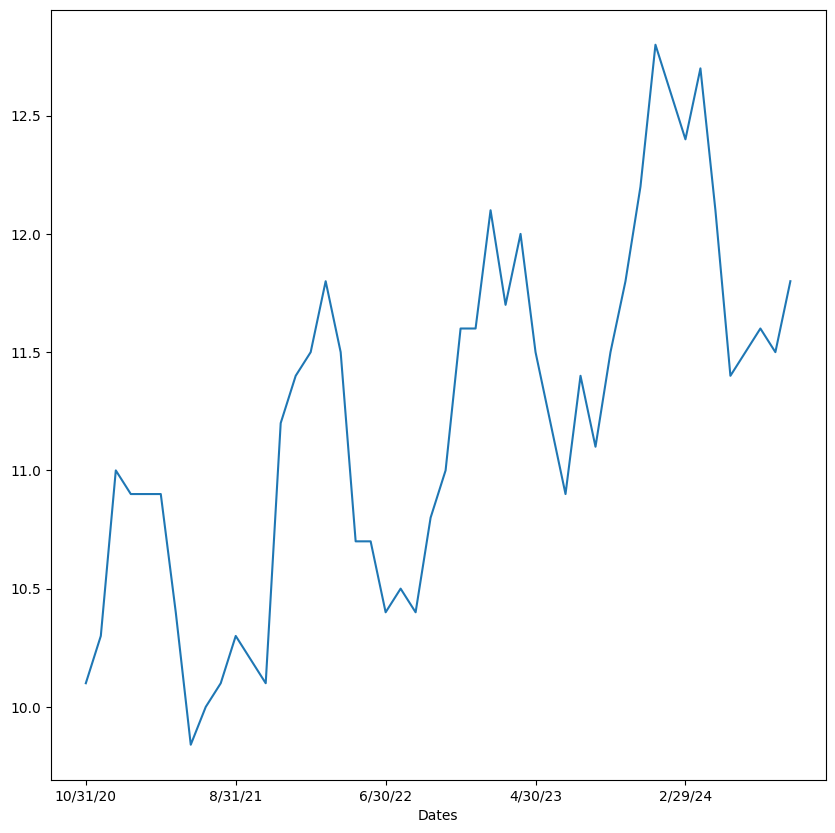

In [6]:
ax=Nat_gas["Prices"].plot(figsize=(10,10))

In [7]:
print(Nat_gas.index)

Index(['10/31/20', '11/30/20', '12/31/20', '1/31/21', '2/28/21', '3/31/21',
       '4/30/21', '5/31/21', '6/30/21', '7/31/21', '8/31/21', '9/30/21',
       '10/31/21', '11/30/21', '12/31/21', '1/31/22', '2/28/22', '3/31/22',
       '4/30/22', '5/31/22', '6/30/22', '7/31/22', '8/31/22', '9/30/22',
       '10/31/22', '11/30/22', '12/31/22', '1/31/23', '2/28/23', '3/31/23',
       '4/30/23', '5/31/23', '6/30/23', '7/31/23', '8/31/23', '9/30/23',
       '10/31/23', '11/30/23', '12/31/23', '1/31/24', '2/29/24', '3/31/24',
       '4/30/24', '5/31/24', '6/30/24', '7/31/24', '8/31/24', '9/30/24'],
      dtype='object', name='Dates')


In [8]:
Nat_gas["SMA_3"]=Nat_gas.Prices.rolling(3).mean()
Nat_gas["SMA_12"]=Nat_gas.Prices.rolling(12).mean()

In [9]:
Nat_gas

,Prices,SMA_3,SMA_12
Dates,,,
10/31/20,10.10,NaN,NaN
11/30/20,10.30,NaN,NaN
12/31/20,11.00,10.466667,NaN
1/31/21,10.90,10.733333,NaN
2/28/21,10.90,10.933333,NaN
3/31/21,10.90,10.900000,NaN
4/30/21,10.40,10.733333,NaN
5/31/21,9.84,10.380000,NaN
6/30/21,10.00,10.080000,NaN


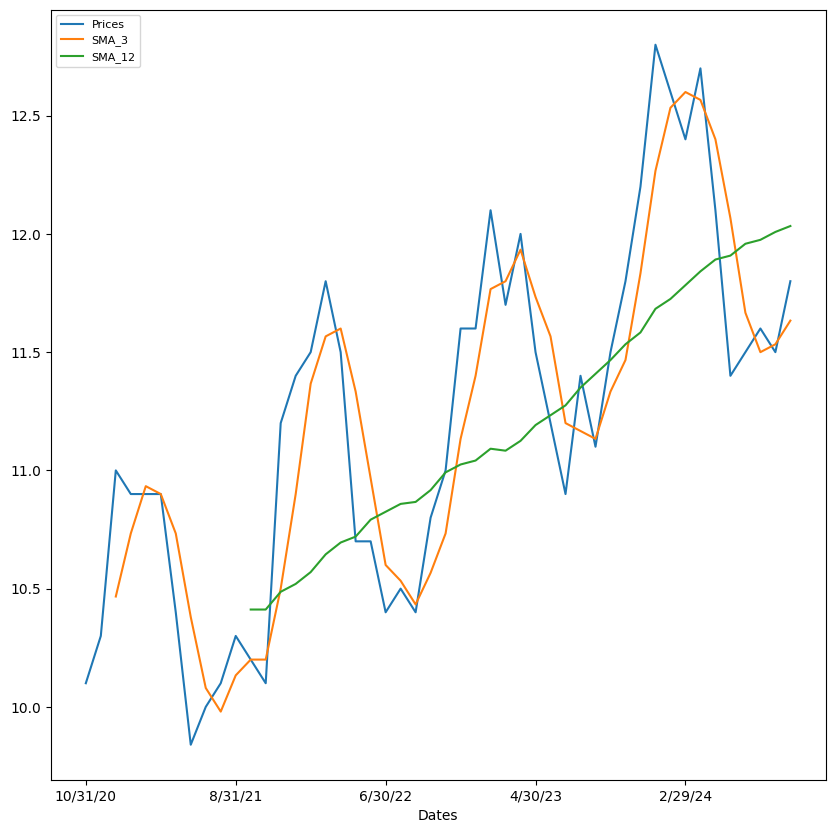

In [10]:
Nat_gas.loc[:,["Prices","SMA_3","SMA_12"]].plot(figsize=(10,10))
plt.legend(loc="upper left",fontsize=8)
plt.show()

In [11]:
time = np.arange(1, len(Nat_gas) + 1)
Nat_gas['time'] = time
data = Nat_gas[['time', 'Prices']]
data.head()

,time,Prices
Dates,,
10/31/20,1,10.1
11/30/20,2,10.3
12/31/20,3,11.0
1/31/21,4,10.9
2/28/21,5,10.9


In [12]:
time

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [13]:
Nat_gas.head()

,Prices,SMA_3,SMA_12,time
Dates,,,,
10/31/20,10.1,NaN,NaN,1
11/30/20,10.3,NaN,NaN,2
12/31/20,11.0,10.466667,NaN,3
1/31/21,10.9,10.733333,NaN,4
2/28/21,10.9,10.933333,NaN,5


In [14]:
reg = np.polyfit(data['time'], data["Prices"], deg = 1)
reg

array([ 0.03901324, 10.25125887])

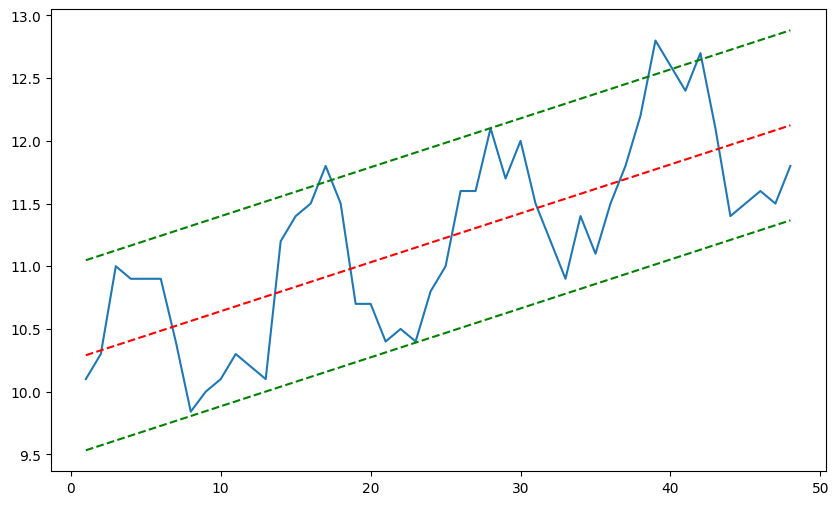

In [15]:
trend = np.polyval(reg, data['time'])
std = data['Prices'].std()
plt.figure(figsize=(10,6))
plt.plot(data['time'].values, data['Prices'].values)
plt.plot(data['time'].values, trend, 'r--')
plt.plot(data['time'].values, trend - std, 'g--')
plt.plot(data['time'].values, trend + std, 'g--');

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
result = seasonal_decompose(Nat_gas['Prices'], model='multiplicative',period = 12)

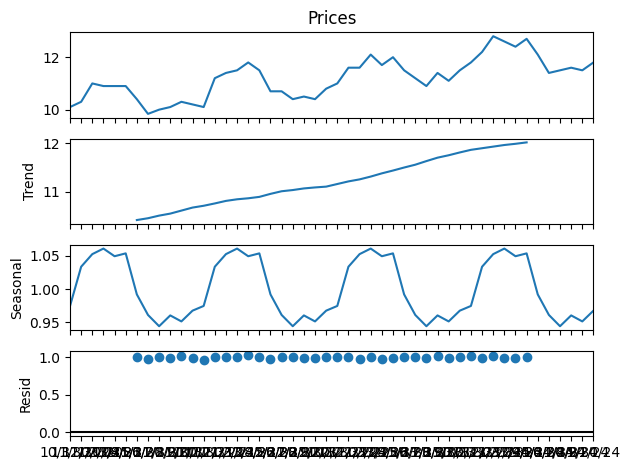

In [18]:
result.plot()
plt.show()

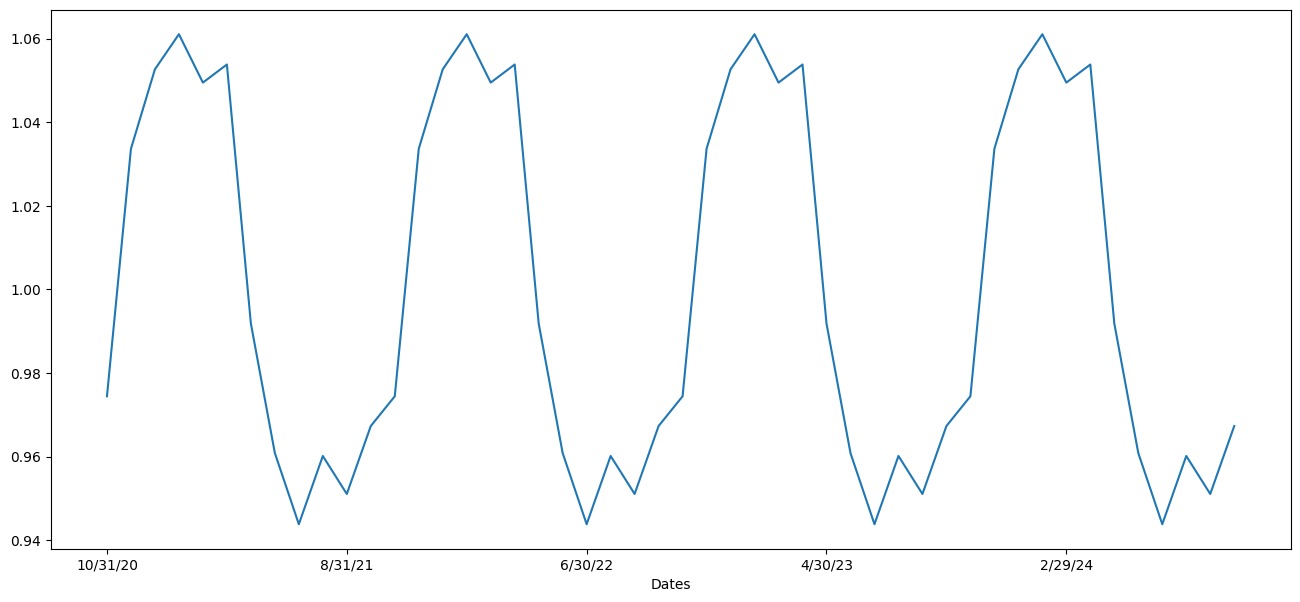

In [19]:
plt.figure(figsize = (16,7))
result.seasonal.plot();

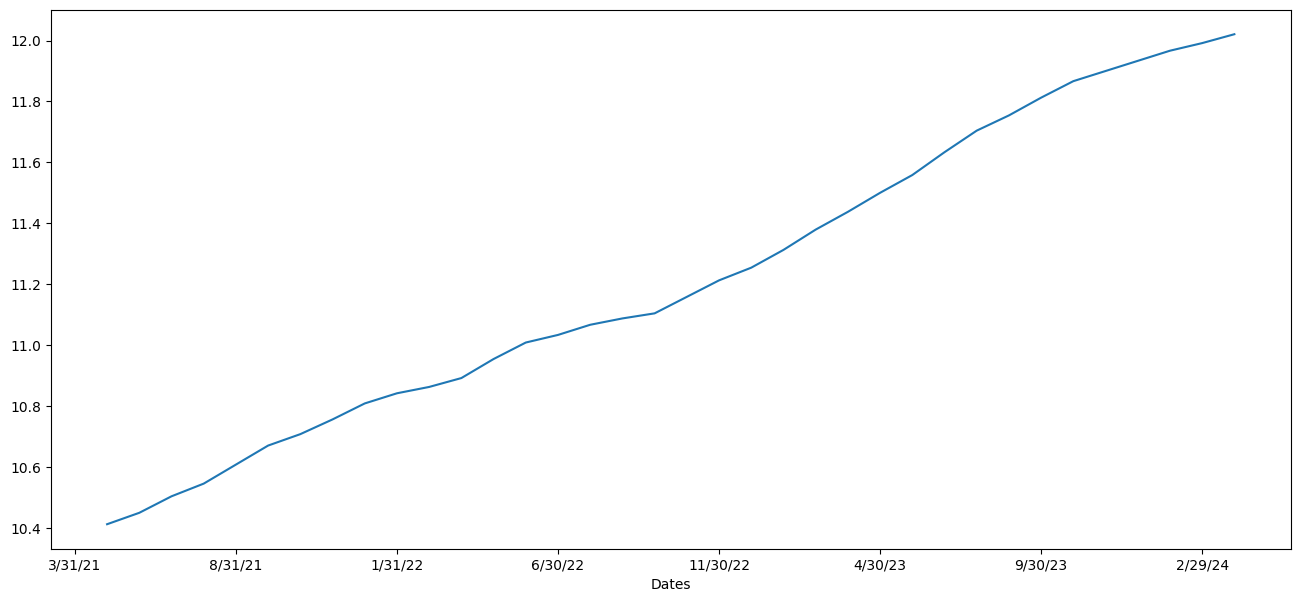

In [20]:
plt.figure(figsize = (16,7))
result.trend.plot();

#Forecasting using SARIMA

In [21]:
# Import data
Nat_gas_df = pd.read_csv("Nat_Gas.csv")

In [22]:
Nat_gas_df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
# Convert Month into Datetime
Nat_gas_df['Dates']=pd.to_datetime(Nat_gas_df['Dates'])

/tmp/ipython-input-24-2162568752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Nat_gas_df['Dates']=pd.to_datetime(Nat_gas_df['Dates'])


In [25]:
Nat_gas_df.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


In [26]:
Nat_gas_df.set_index('Dates',inplace=True)

In [27]:
Nat_gas_df.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


<Axes: xlabel='Dates'>

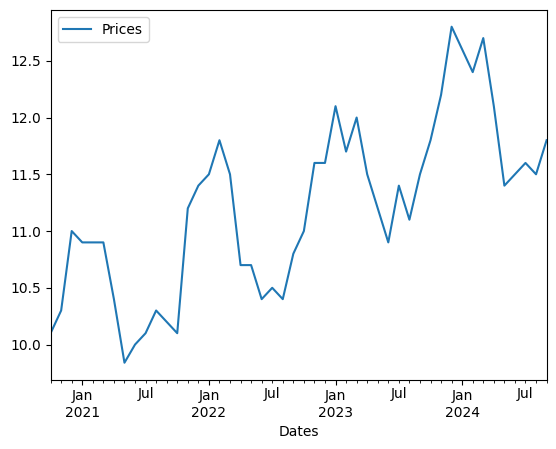

In [28]:
Nat_gas_df.plot()

In [29]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [30]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [31]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Prices):
    result=adfuller(Prices)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [32]:
adfuller_test(Nat_gas_df['Prices'])

ADF Test Statistic : 0.21807686169999427
p-value : 0.973257438844869
#Lags Used : 10
Number of Observations Used : 37
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [33]:
!pip install pmdarima

In [38]:
import pmdarima as pm

In [39]:
from pmdarima.model_selection import train_test_split

In [40]:
#Let's run auto_arima() function to get best p,d,q,P,D,Q values

pm.auto_arima(Nat_gas_df['Prices'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4,
               trace=True,error_action='ignore', suppress_warnings=True, stepwise=True).summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=37.114, Time=1.91 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=48.334, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=38.394, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=42.336, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[12]             : AIC=46.741, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=39.794, Time=0.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=39.011, Time=1.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=38.448, Time=1.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=36.222, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=53.197, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=53.566, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=53.701, Time=0.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=53.674, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=51.953, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=54.043, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=1.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(2,1,2)(0,0,0)[12]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(2,1,2)(0,0,0)[12] intercept
Total fit time: 9.553 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 -12.111
Date:                Sun, 29 Jun 2025   AIC                             36.222
Time:                        06:16:48   BIC                             47.323
Sample:                    10-31-2020   HQIC                            40.399
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0099      0.007      1.402      0.161      -0.004       0.024
ar.L1          1.6929      0.049     34.369      0.000       1.596       1.789
ar.L2         -0.9564      0.048    -20.009      0.000      -1.050      -0.863
ma.L1         -1.8039      0.235     -7.677      0.000      -2.264      -1.343
ma.L2          0.9392      0.257      3.648      0.000       0.435       1.444
sigma2         0.0892      0.027      3.249      0.001       0.035       0.143
===================================================================================
Ljung-Box (L1) (Q):                   6.22   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.01   Prob(JB):                         0.34
Heteroskedasticity (H):               0.90   Skew:                             0.48
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
# Let's split the data into train and test set

train_data = Nat_gas_df[:len(Nat_gas_df)-12]
test_data = Nat_gas_df[len(Nat_gas_df)-12:]

In [42]:
arima_model = SARIMAX(train_data['Prices'], order = (2,1,2), seasonal_order = (1,1,1,12))
arima_result = arima_model.fit()
arima_result.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               Prices   No. Observations:                   36
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                   0.166
Date:                              Sun, 29 Jun 2025   AIC                             13.669
Time:                                      06:17:50   BIC                             21.617
Sample:                                  10-31-2020   HQIC                            15.668
                                       - 09-30-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0933     65.330     -0.017      0.987    -129.137     126.951
ar.L2         -0.0939      6.292     -0.015      0.988     -12.425      12.238
ma.L1         -0.2573    672.501     -0.000      1.000   -1318.335    1317.821
ma.L2         -0.7425    499.371     -0.001      0.999    -979.493     978.008
ar.S.L12      -0.6459      0.832     -0.776      0.438      -2.277       0.985
ma.S.L12      -0.9952    870.918     -0.001      0.999   -1707.964    1705.973
sigma2         0.0156     16.510      0.001      0.999     -32.343      32.374
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.84   Prob(JB):                         0.82
Heteroskedasticity (H):               0.92   Skew:                            -0.22
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
arima_pred = arima_result.predict(start = len(train_data), end = len(Nat_gas_df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,ARIMA Predictions
2023-10-31,11.122590
2023-11-30,12.294499
2023-12-31,12.406619
2024-01-31,12.669052
2024-02-29,12.660612
2024-03-31,12.667177
2024-04-30,11.677789
2024-05-31,11.728492
2024-06-30,11.412292
2024-07-31,11.637049


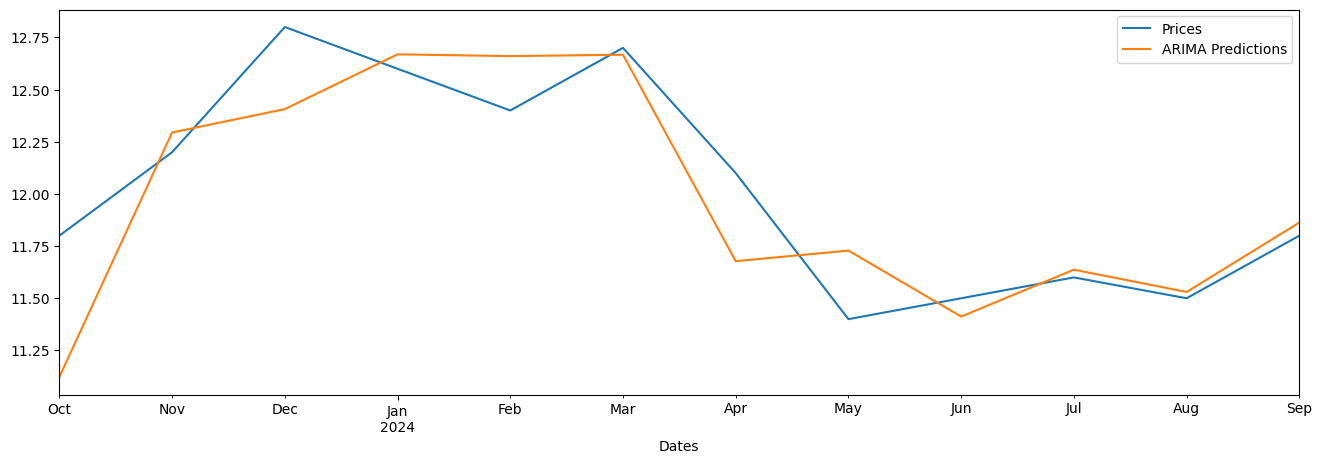

In [44]:
test_data['Prices'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

<Axes: xlabel='Dates'>

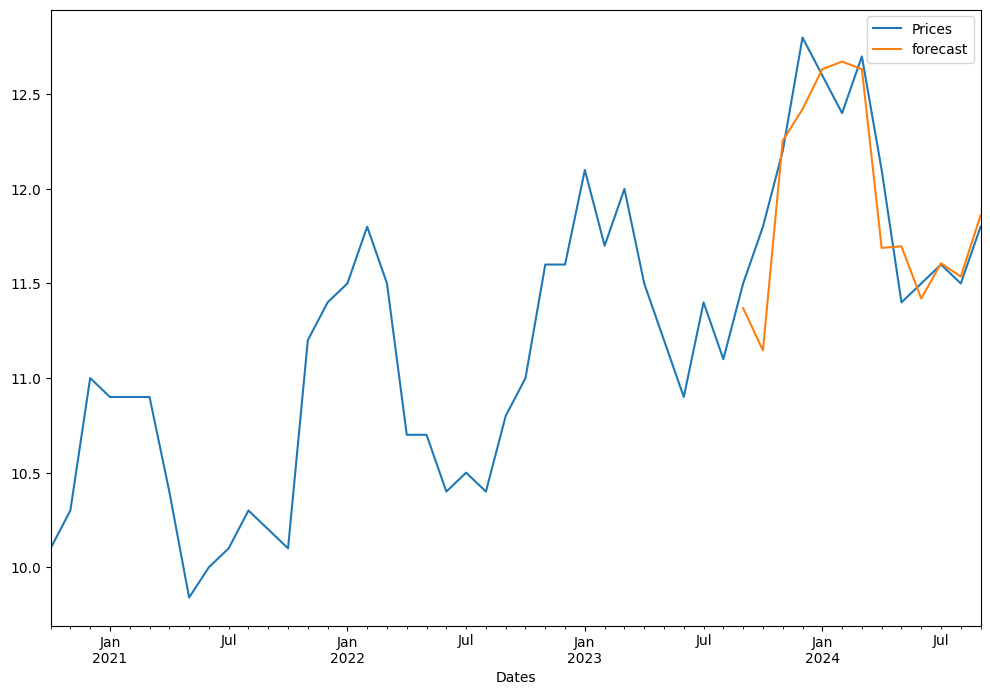

In [45]:
Nat_gas_df['forecast']=arima_result.predict(start=35,end=47,dynamic=True)
Nat_gas_df[['Prices','forecast']].plot(figsize=(12,8))

In [46]:
Nat_gas_df.tail(12)

,Prices,forecast
Dates,,
2023-10-31,11.8,11.145941
2023-11-30,12.2,12.255412
2023-12-31,12.8,12.421053
2024-01-31,12.6,12.632679
2024-02-29,12.4,12.672916
2024-03-31,12.7,12.632879
2024-04-30,12.1,11.688022
2024-05-31,11.4,11.696264
2024-06-30,11.5,11.420454


In [47]:
test_data['ARIMA_Predictions'] = arima_pred

/tmp/ipython-input-47-3839166069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA_Predictions'] = arima_pred


In [48]:
test_data

,Prices,ARIMA_Predictions
Dates,,
2023-10-31,11.8,11.122590
2023-11-30,12.2,12.294499
2023-12-31,12.8,12.406619
2024-01-31,12.6,12.669052
2024-02-29,12.4,12.660612
2024-03-31,12.7,12.667177
2024-04-30,12.1,11.677789
2024-05-31,11.4,11.728492
2024-06-30,11.5,11.412292


In [49]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [50]:
arima_rmse_error = rmse(test_data['Prices'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = Nat_gas_df['Prices'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 0.08303640690972014
RMSE Error: 0.2881603840046722
Mean: 11.207083333333332


#Run entire code after entering date


In [51]:
arima_pred_full = arima_result.predict(start = 0, end = len(Nat_gas_df)-1, typ="levels").rename("ARIMA Predictions")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [52]:
#enter Month and year in following format 'yyyy/mm/dd' -- KEEP day at end of the month AND THEN Run the ENTIRE code
#example : userdate = 2024-05-31
userdate = '2024-05-31'
arima_pred_full.loc[userdate]

11.728492079182136

In [53]:
# Actual Price
Nat_gas_df.loc[userdate]['Prices']

11.4

# Extrapolate 1 year in the future

In [54]:
#enter Month and year in following format 'yyyy/mm/dd' -- KEEP day at end of the month AND THEN Run the ENTIRE code
#example : userdate = 2024-05-31
userdate = '2020-12-31'
start = Nat_gas_df.index.get_loc(userdate)
arima_pred_future = arima_result.predict(start = start, end = start+12, typ="levels").rename("ARIMA Predictions")

In [55]:
arima_pred_future.tail(1)

,ARIMA Predictions
2021-12-31,11.270096


In [56]:
# Actual Price in next 12 months
Nat_gas_df.iloc[start+12]

,2021-12-31
Prices,11.4
forecast,NaN


#Forecasting using Prophet

In [57]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [58]:
#read in the data
df = pd.read_csv('Nat_Gas.csv')
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [59]:
#Select the date and the price
df = df[['Dates', 'Prices']]
#Rename the features:
df = df.rename(columns={'Dates':'ds', 'Prices':'y'})
df.head()

,ds,y
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [61]:
# Get last 12 rows of data and store them into a new variable
last = df[len(df)-12:]
last

,ds,y
36,10/31/23,11.8
37,11/30/23,12.2
38,12/31/23,12.8
39,1/31/24,12.6
40,2/29/24,12.4
41,3/31/24,12.7
42,4/30/24,12.1
43,5/31/24,11.4
44,6/30/24,11.5
45,7/31/24,11.6


In [62]:
#Get all rows except the last 12
df = df[:-12]
df.head()

,ds,y
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [63]:
#Creating Prophet Object (Model)
fbp = Prophet(seasonality_mode='multiplicative', mcmc_samples=360)

#Train the model
fbp.fit(df)
future = fbp.make_future_dataframe(periods=24, freq='M')
forecast = fbp.predict(future)

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1136: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:290: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3n5debny/xn

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=8571', 'data', 'file=/tmp/tmp3n5debny/xnt4tld0.json', 'init=/tmp/tmp3n5debny/nok2b3da.json', 'output', 'file=/tmp/tmp3n5debny/prophet_model9_v5nbmb/prophet_model-20250629062323_2.csv', 'method=sample', 'num_samples=180', 'num_warmup=180', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=8571', 'data', 'file=/tmp/tmp3n5debny/xnt4tld0.json', 'init=/tmp/tmp3n5debny/nok2b3da.json', 'output', 'file=/tmp/tmp3n5debny/prophet_model9_v5nbmb/prophet_model-20250629062323_1.csv', 'method=sample', 'num_samples=180', 'num_warmup=180', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdsta

06:23:28 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=8571', 'data', 'file=/tmp/tmp3n5debny/xnt4tld0.json', 'init=/tmp/tmp3n5debny/nok2b3da.json', 'output', 'file=/tmp/tmp3n5debny/prophet_model9_v5nbmb/prophet_model-20250629062323_1.csv', 'method=sample', 'num_samples=180', 'num_warmup=180', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp3n5debny/prophet_model9_v5nbmb/prophet_model-20250629062323_1.csv
 console_msgs (if any):
	/tmp/tmp3n5debny/prophet_model9_v5nbmb/prophet_model-20250629062323_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 180
    num_warmup = 180
    save_warmup = 0 (Default)
    thin = 1 (Defaul

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [64]:
#plot the data
plot_plotly(fbp, forecast)

In [65]:
forecast.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
45,2024-07-31,12.512381,11.055699,12.634597,11.909640,13.085345,-0.052678,-0.092494,-0.012243,-0.052678,-0.092494,-0.012243,0.0,0.0,0.0,11.853252
46,2024-08-31,12.580209,11.493937,13.201018,11.914713,13.215571,-0.016175,-0.054795,0.022551,-0.016175,-0.054795,0.022551,0.0,0.0,0.0,12.376719
47,2024-09-30,12.645849,11.187850,13.003401,11.902102,13.353069,-0.043308,-0.078178,-0.008974,-0.043308,-0.078178,-0.008974,0.0,0.0,0.0,12.098185
48,2024-10-31,12.713677,11.422187,13.198404,11.895620,13.504734,-0.029044,-0.056742,-0.000468,-0.029044,-0.056742,-0.000468,0.0,0.0,0.0,12.344417
49,2024-11-30,12.779317,11.896822,13.870578,11.898580,13.633650,0.007898,-0.013811,0.029376,0.007898,-0.013811,0.029376,0.0,0.0,0.0,12.880252
50,2024-12-31,12.847145,12.580939,14.836026,11.905461,13.785601,0.068360,0.041073,0.095827,0.068360,0.041073,0.095827,0.0,0.0,0.0,13.725371
51,2025-01-31,12.914973,12.427470,14.850496,11.887685,13.940530,0.053735,0.024864,0.082992,0.053735,0.024864,0.082992,0.0,0.0,0.0,13.608953
52,2025-02-28,12.976237,12.506586,15.057834,11.858962,14.089251,0.063566,0.043926,0.082732,0.063566,0.043926,0.082732,0.0,0.0,0.0,13.801090
53,2025-03-31,13.044065,12.350156,15.009371,11.830447,14.246933,0.048809,0.026008,0.072744,0.048809,0.026008,0.072744,0.0,0.0,0.0,13.680739
54,2025-04-30,13.109705,11.593784,14.298635,11.794777,14.403535,-0.010400,-0.033093,0.014217,-0.010400,-0.033093,0.014217,0.0,0.0,0.0,12.973365


In [66]:
#Show the models prediction for 8/31/24
forecast[forecast.ds == '8/31/24']['yhat']

,yhat
46,12.376719


In [67]:
#Actual price for 8/31/24
last[last.ds == '8/31/24']['y']

,y
46,11.5


#Run entire code after entering date

In [68]:
future = fbp.make_future_dataframe(periods=120, freq='MS')
forecast = fbp.predict(future)

#enter Month and year in following format 'mm/01/yy' -- KEEP day @ '01' AND THEN Run the ENTIRE code
#example : userdate = 01/01/24
userdate = '01/01/24'
forecast[forecast.ds == userdate]['yhat']

,yhat
39,13.081595


In [69]:
#Actual price for user date
last[last.ds == '1/31/24']['y']

,y
39,12.6


In [70]:
forecast[forecast.ds == userdate].index.values

array([39])

In [71]:
# Forecast of Price next 12 months
T = forecast[forecast.ds == userdate].index.values +12
forecast.iloc[T]['yhat']

,yhat
51,14.603807
